# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***, so it will be challenging. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

/Users/jose1/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1b. Load data 

In [2]:
# Read in the data to a variable called coffeeData
coffeeData=pd.read_csv('RRDinerCoffeeData.csv')

## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [3]:
# Call head() on your data 
coffeeData.head()

Age  Gender  num_coffeeBags_per_year  spent_week  spent_month  SlrAY  \
0   36  Female                        0          24           73  42789   
1   24    Male                        0          44          164  74035   
2   24    Male                        0          39          119  30563   
3   20    Male                        0          30          107  13166   
4   24  Female                        0          20           36  14244   

   Distance  Online  Decision  
0  0.003168       0       1.0  
1  0.520906       0       NaN  
2  0.916005       1       1.0  
3  0.932098       1       NaN  
4  0.965881       0       1.0

In [4]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [5]:
# Call info() on your data
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [6]:
# Call describe() on your data to get the relevant summary statistics for your data 
coffeeData.describe()

Age  num_coffeeBags_per_year  spent_week  spent_month  \
count  702.000000               702.000000  702.000000   702.000000   
mean    34.243590                 2.710826   32.853276   107.923077   
std     13.927945                 1.593629   15.731878    55.348485   
min     16.000000                 0.000000    0.000000     0.000000   
25%     23.000000                 1.000000   24.250000    62.000000   
50%     28.000000                 3.000000   36.000000   113.500000   
75%     46.000000                 4.000000   43.000000   150.750000   
max     90.000000                 5.000000   62.000000   210.000000   

               SlrAY    Distance      Online    Decision  
count     702.000000  702.000000  702.000000  474.000000  
mean    43819.843305    4.559186    0.531339    0.639241  
std     26192.626943    3.116275    0.499373    0.480728  
min      1617.000000    0.003168    0.000000    0.000000  
25%     22812.250000    1.877812    0.000000    0.000000  
50%     41975.000000    4.196167    1.000000    1.000000  
75%     60223.000000    6.712022    1.000000    1.000000  
max    182058.000000   10.986203    1.000000    1.000000

# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [7]:
# Check out the names of our data's columns 
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [8]:
# Make the relevant name changes to spent_week and spent_per_week.

coffeeData.rename(columns={'spent_week': 'spent_last_week', 'spent_month': 'spent_last_month', 'SlrAY': 'salary'}, inplace=True)



In [9]:
# Check out the column names
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [10]:
# Let's have a closer look at the gender column. Its values need cleaning.
total=len(coffeeData.Gender)
print(total)
Gender_unique=coffeeData.Gender.nunique()
percentage_GENDER_unique=Gender_unique/total
print(percentage_GENDER_unique)

702
0.01282051282051282


In [11]:
# See the gender column's unique values 
coffeeData.Gender.unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [12]:
# Replace all alternate values for the Female entry with 'Female'

coffeeData['Gender'] = coffeeData['Gender'].replace(['female','F','f','FEMALE','f '],'Female')


In [13]:
# Check out the unique values for the 'gender' column
coffeeData.Gender.unique()

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [14]:
# Replace all alternate values with "Male"
coffeeData['Gender'] = coffeeData['Gender'].replace(['MALE','male','M'],'Male') 

In [15]:
# Let's check the unique values of the column "gender"
coffeeData.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
# Check out the unique values of the column 'Decision'
coffeeData.Decision.unique()

array([ 1., nan,  0.])

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [17]:
# Replace 'Yes' and 'No' by 1 and 0
coffeeData['Decision'] = coffeeData['Decision'].replace(1,'YES') 
coffeeData['Decision'] = coffeeData['Decision'].replace(0,'NO') 

In [18]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
coffeeData.Decision.unique()

array(['YES', nan, 'NO'], dtype=object)

## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [19]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData

#Run the code below to print out the percent of each feature that is missing.
nas=pd.DataFrame(coffeeData.isnull().sum().sort_values(ascending=False)/len(coffeeData),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]


percent
Decision  0.324786

In [20]:

NOPrediction=coffeeData.dropna(subset = ["Decision"])
print("Unique values on Decision",NOPrediction.Decision.unique())
NOPrediction.Decision.describe()

Unique values on Decision ['YES' 'NO']


count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

In [22]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_today
import plotly.express as px
df = px.data.tips()
fig = px.box(NOPrediction, x='Decision', y='spent_last_week', points="all")
fig.show()

Can you admissibly conclude anything from this boxplot? Write your answer here:



In [23]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
import plotly.express as px
df = NOPrediction
fig = px.scatter_matrix(df,
    dimensions=['Age', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance'],
    color='Decision', symbol='Decision',
    title="Scatter matrix of Decision prediction data set",
    labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()

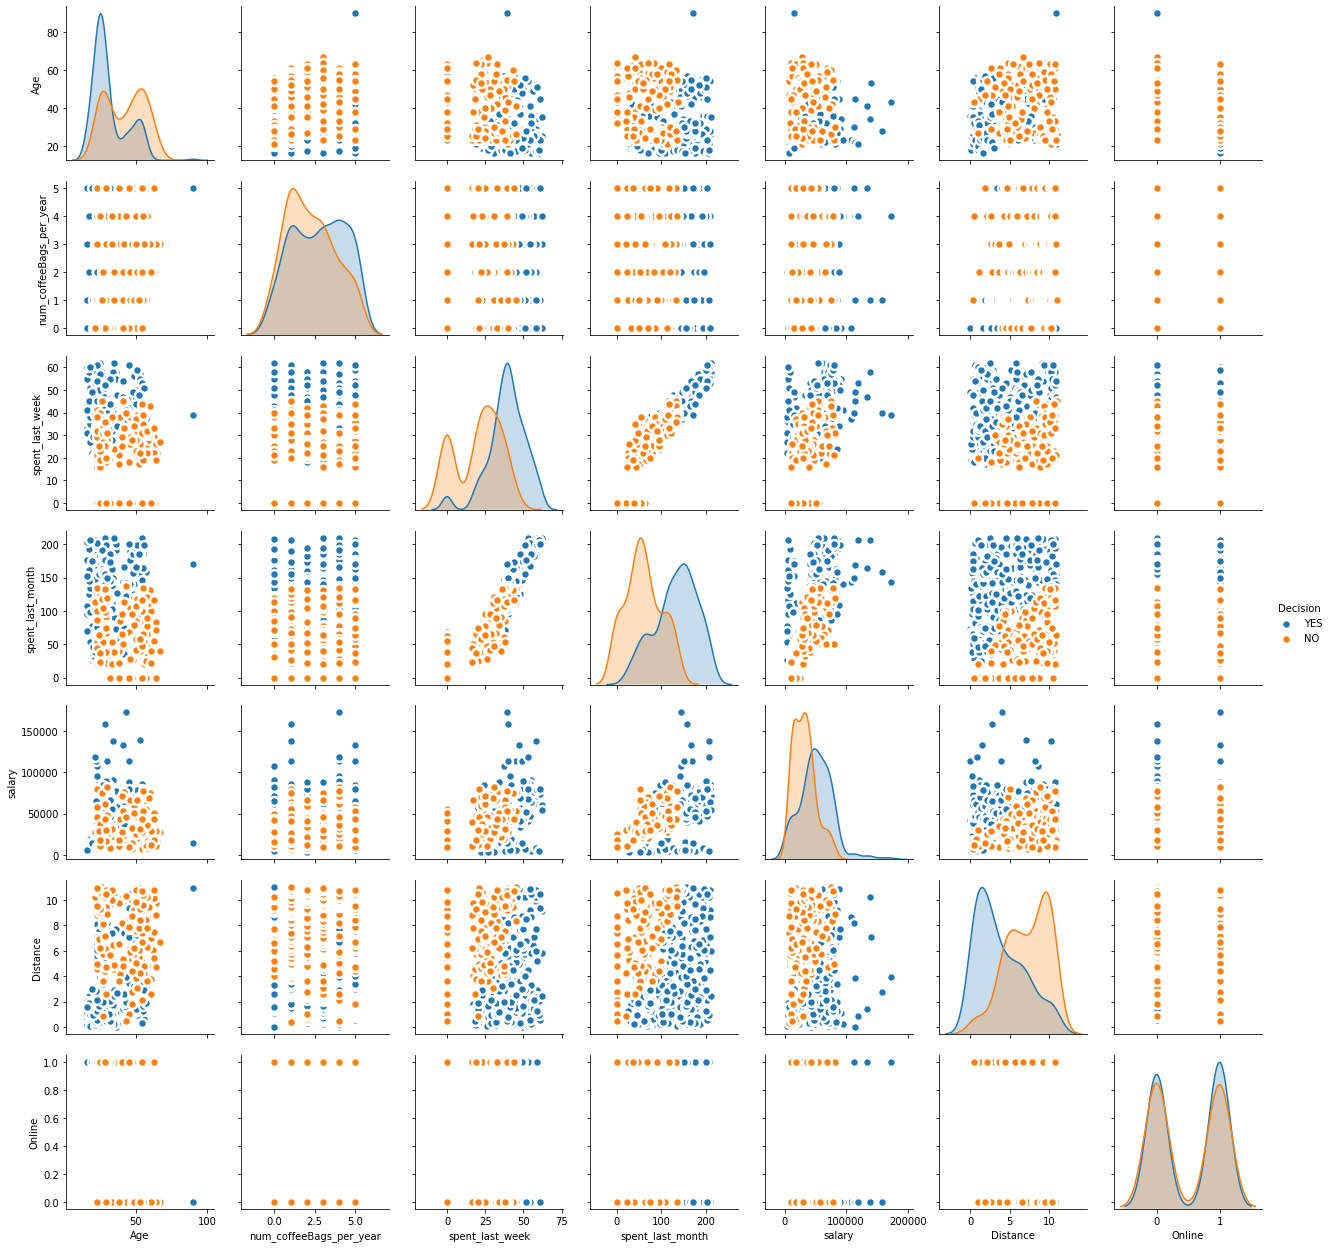

In [24]:
sns.pairplot(NOPrediction, kind="scatter", hue='Decision', plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

We can probably find linear boundry that separates the customers that decided that they would buy the Hidden Farm coffee by looking at the Distance, spent last month, and spent last week variables.

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [25]:
# Get just those rows whose value for the Decision column is null  
Prediction=coffeeData[coffeeData['Decision'].isnull()]
 

In [26]:
# Call describe() on Prediction
Prediction.describe()

Age  num_coffeeBags_per_year  spent_last_week  spent_last_month  \
count  228.000000               228.000000       228.000000        228.000000   
mean    31.802632                 2.960526        33.394737        110.407895   
std     14.302293                 1.585514        15.697930         53.786536   
min     16.000000                 0.000000         0.000000          0.000000   
25%     22.000000                 2.000000        25.750000         65.000000   
50%     25.000000                 3.000000        37.000000        113.500000   
75%     39.000000                 4.000000        44.000000        151.250000   
max     67.000000                 5.000000        62.000000        210.000000   

              salary    Distance      Online  
count     228.000000  228.000000  228.000000  
mean    41923.741228    3.428836    0.570175  
std     27406.768360    2.153102    0.496140  
min      1617.000000    0.010048    0.000000  
25%     15911.500000    1.699408    0.000000  
50%     40987.500000    3.208673    1.000000  
75%     58537.000000    5.261184    1.000000  
max    182058.000000   10.871566    1.000000

### 4. Divide the NOPrediction subset into X and y

In [27]:
# Check the names of the columns of NOPrediction
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

### 4. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

In [28]:
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
X_cat=NOPrediction[['Gender','num_coffeeBags_per_year','Online']].astype(str)

X_cat.columns
print(X_cat.info())
print(NOPrediction.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 701
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   474 non-null    object
 1   num_coffeeBags_per_year  474 non-null    object
 2   Online                   474 non-null    object
dtypes: object(3)
memory usage: 34.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   Gender                   474 non-null    object 
 2   num_coffeeBags_per_year  474 non-null    int64  
 3   spent_last_week          474 non-null    int64  
 4   spent_last_month         474 non-null    int64  
 5   salary                   474 non-null    int64  
 6   Distance                 474 non-null    flo

In [29]:

import pandas as pd

# encode string input values as integers WITH sklearn!!!!


encoded_x = None
for i in range(0, X_cat.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X_cat.iloc[:,i])
    feature = feature.reshape(X_cat.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = pd.DataFrame(onehot_encoder.fit_transform(feature))
    feature.columns = onehot_encoder.get_feature_names([X_cat.columns[i]])
    feature_df=pd.DataFrame(feature)
    print(feature_df.columns)
    print(type(feature))
    print(feature_df.shape)
    if encoded_x is None:
        encoded_x = feature_df
    else:
         #encoded_x = pd.DataFrame(np.concatenate((encoded_x, feature_df), axis=1))
        #encoded_x=encoded_x.append(feature_df)
        encoded_x=pd.concat([encoded_x, feature_df], axis=1)
        print('encoded',encoded_x.shape)
        #encoded_x[feature]=feature
encoded_x_df=pd.DataFrame(encoded_x)
print("X shape: : ", encoded_x_df.shape)
print(encoded_x_df.columns)

Index(['Gender_0', 'Gender_1'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
(474, 2)
Index(['num_coffeeBags_per_year_0', 'num_coffeeBags_per_year_1',
       'num_coffeeBags_per_year_2', 'num_coffeeBags_per_year_3',
       'num_coffeeBags_per_year_4', 'num_coffeeBags_per_year_5'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
(474, 6)
encoded (474, 8)
Index(['Online_0', 'Online_1'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
(474, 2)
encoded (474, 10)
X shape: :  (474, 10)
Index(['Gender_0', 'Gender_1', 'num_coffeeBags_per_year_0',
       'num_coffeeBags_per_year_1', 'num_coffeeBags_per_year_2',
       'num_coffeeBags_per_year_3', 'num_coffeeBags_per_year_4',
       'num_coffeeBags_per_year_5', 'Online_0', 'Online_1'],
      dtype='object')


In [30]:
print(encoded_x_df.columns)
print(encoded_x_df.shape)
print(encoded_x_df.info())

Index(['Gender_0', 'Gender_1', 'num_coffeeBags_per_year_0',
       'num_coffeeBags_per_year_1', 'num_coffeeBags_per_year_2',
       'num_coffeeBags_per_year_3', 'num_coffeeBags_per_year_4',
       'num_coffeeBags_per_year_5', 'Online_0', 'Online_1'],
      dtype='object')
(474, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender_0                   474 non-null    float64
 1   Gender_1                   474 non-null    float64
 2   num_coffeeBags_per_year_0  474 non-null    float64
 3   num_coffeeBags_per_year_1  474 non-null    float64
 4   num_coffeeBags_per_year_2  474 non-null    float64
 5   num_coffeeBags_per_year_3  474 non-null    float64
 6   num_coffeeBags_per_year_4  474 non-null    float64
 7   num_coffeeBags_per_year_5  474 non-null    float64
 8   Online_0                   474 non-null    floa

In [31]:
#NOPrediction[['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
#       'spent_last_month', 'salary', 'Distance', 'Online']]
print(encoded_x_df.columns)
print(type(encoded_x_df))
encoded_x_df.info()

Index(['Gender_0', 'Gender_1', 'num_coffeeBags_per_year_0',
       'num_coffeeBags_per_year_1', 'num_coffeeBags_per_year_2',
       'num_coffeeBags_per_year_3', 'num_coffeeBags_per_year_4',
       'num_coffeeBags_per_year_5', 'Online_0', 'Online_1'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender_0                   474 non-null    float64
 1   Gender_1                   474 non-null    float64
 2   num_coffeeBags_per_year_0  474 non-null    float64
 3   num_coffeeBags_per_year_1  474 non-null    float64
 4   num_coffeeBags_per_year_2  474 non-null    float64
 5   num_coffeeBags_per_year_3  474 non-null    float64
 6   num_coffeeBags_per_year_4  474 non-null    float64
 7   num_coffeeBags_per_year_5  474 non-null    float64
 8   Online_0           

In [32]:
X_all_2=encoded_x_df

result_1=pd.concat([X_all_2,NOPrediction['Age'],NOPrediction['spent_last_week'],NOPrediction['spent_last_month'],NOPrediction['salary'],NOPrediction['Decision']],axis=1)

print(result_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender_0                   474 non-null    float64
 1   Gender_1                   474 non-null    float64
 2   num_coffeeBags_per_year_0  474 non-null    float64
 3   num_coffeeBags_per_year_1  474 non-null    float64
 4   num_coffeeBags_per_year_2  474 non-null    float64
 5   num_coffeeBags_per_year_3  474 non-null    float64
 6   num_coffeeBags_per_year_4  474 non-null    float64
 7   num_coffeeBags_per_year_5  474 non-null    float64
 8   Online_0                   474 non-null    float64
 9   Online_1                   474 non-null    float64
dtypes: float64(10)
memory usage: 37.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 701
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------    

In [33]:
result_1.describe()

Gender_0    Gender_1  num_coffeeBags_per_year_0  \
count  474.000000  474.000000                 474.000000   
mean     0.508439    0.491561                   0.086498   
std      0.500457    0.500457                   0.281395   
min      0.000000    0.000000                   0.000000   
25%      0.000000    0.000000                   0.000000   
50%      1.000000    0.000000                   0.000000   
75%      1.000000    1.000000                   0.000000   
max      1.000000    1.000000                   1.000000   

       num_coffeeBags_per_year_1  num_coffeeBags_per_year_2  \
count                 474.000000                 474.000000   
mean                    0.232068                   0.168776   
std                     0.422598                   0.374950   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       num_coffeeBags_per_year_3  num_coffeeBags_per_year_4  \
count                 474.000000                 474.000000   
mean                    0.187764                   0.166667   
std                     0.390936                   0.373072   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       num_coffeeBags_per_year_5    Online_0    Online_1         Age  \
count                 474.000000  474.000000  474.000000  474.000000   
mean                    0.158228    0.487342    0.512658   35.417722   
std                     0.365340    0.500368    0.500368   13.604135   
min                     0.000000    0.000000    0.000000   16.000000   
25%                     0.000000    0.000000    0.000000   25.000000   
50%                     0.000000    0.000000    1.000000   29.000000   
75%                     0.000000    1.000000    1.000000   49.000000   
max                     1.000000    1.000000    1.000000   90.000000   

       spent_last_week  spent_last_month         salary  
count       474.000000        474.000000     474.000000  
mean         32.592827        106.727848   44731.892405  
std          15.758109         56.101085   25567.674430  
min           0.000000          0.000000    3150.000000  
25%          24.000000         60.000000   27284.250000  
50%          35.000000        113.500000   42791.500000  
75%          43.000000        150.000000   61621.750000  
max          62.000000        210.000000  172658.000000

In [132]:
print(result_1.columns)

Index(['Gender_0', 'Gender_1', 'num_coffeeBags_per_year_0',
       'num_coffeeBags_per_year_1', 'num_coffeeBags_per_year_2',
       'num_coffeeBags_per_year_3', 'num_coffeeBags_per_year_4',
       'num_coffeeBags_per_year_5', 'Online_0', 'Online_1', 'Age',
       'spent_last_week', 'spent_last_month', 'salary'],
      dtype='object')


In [34]:
nas=pd.DataFrame(result_1.isnull().sum().sort_values(ascending=False)/len(result_1),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

percent
Decision                   0.22549
salary                     0.22549
spent_last_month           0.22549
spent_last_week            0.22549
Age                        0.22549
Online_1                   0.22549
Online_0                   0.22549
num_coffeeBags_per_year_5  0.22549
num_coffeeBags_per_year_4  0.22549
num_coffeeBags_per_year_3  0.22549
num_coffeeBags_per_year_2  0.22549
num_coffeeBags_per_year_1  0.22549
num_coffeeBags_per_year_0  0.22549
Gender_1                   0.22549
Gender_0                   0.22549

In [35]:
result_NoNAN=result_1.dropna()

In [36]:
# encode string class values as integers
y_1=result_NoNAN[['Decision']].astype(str)
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(y)
#label_encoded_y = label_encoder.transform(y)


In [37]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
from sklearn.model_selection import train_test_split
X_1=result_NoNAN.drop(['Decision'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=246)

# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [38]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
from sklearn import tree

entr_model = tree.DecisionTreeClassifier()


# Call fit() on entr_model
entr_model = entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred =entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred) 

# Check out entr_model
entr_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(157.78581081081083, 206.56799999999998, 'X[12] <= 90.5\ngini = 0.489\nsamples = 252\nvalue = [107, 145]'),
 Text(54.29189189189189, 184.824, 'X[10] <= 22.5\ngini = 0.363\nsamples = 109\nvalue = [83, 26]'),
 Text(45.24324324324325, 163.07999999999998, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(63.340540540540545, 163.07999999999998, 'X[10] <= 26.5\ngini = 0.207\nsamples = 94\nvalue = [83, 11]'),
 Text(36.1945945945946, 141.336, 'X[12] <= 64.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(27.145945945945947, 119.592, 'X[2] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(18.0972972972973, 97.848, 'X[12] <= 52.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(9.04864864864865, 76.10399999999998, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(27.145945945945947, 76.10399999999998, 'X[12] <= 54.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(18.0972972972973, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(36.19459459

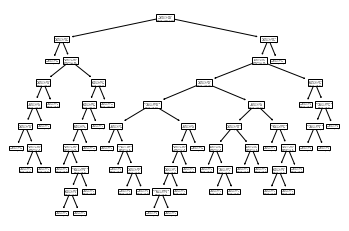

In [165]:
# Now we want to visualize the tree
tree.plot_tree(entr_model)



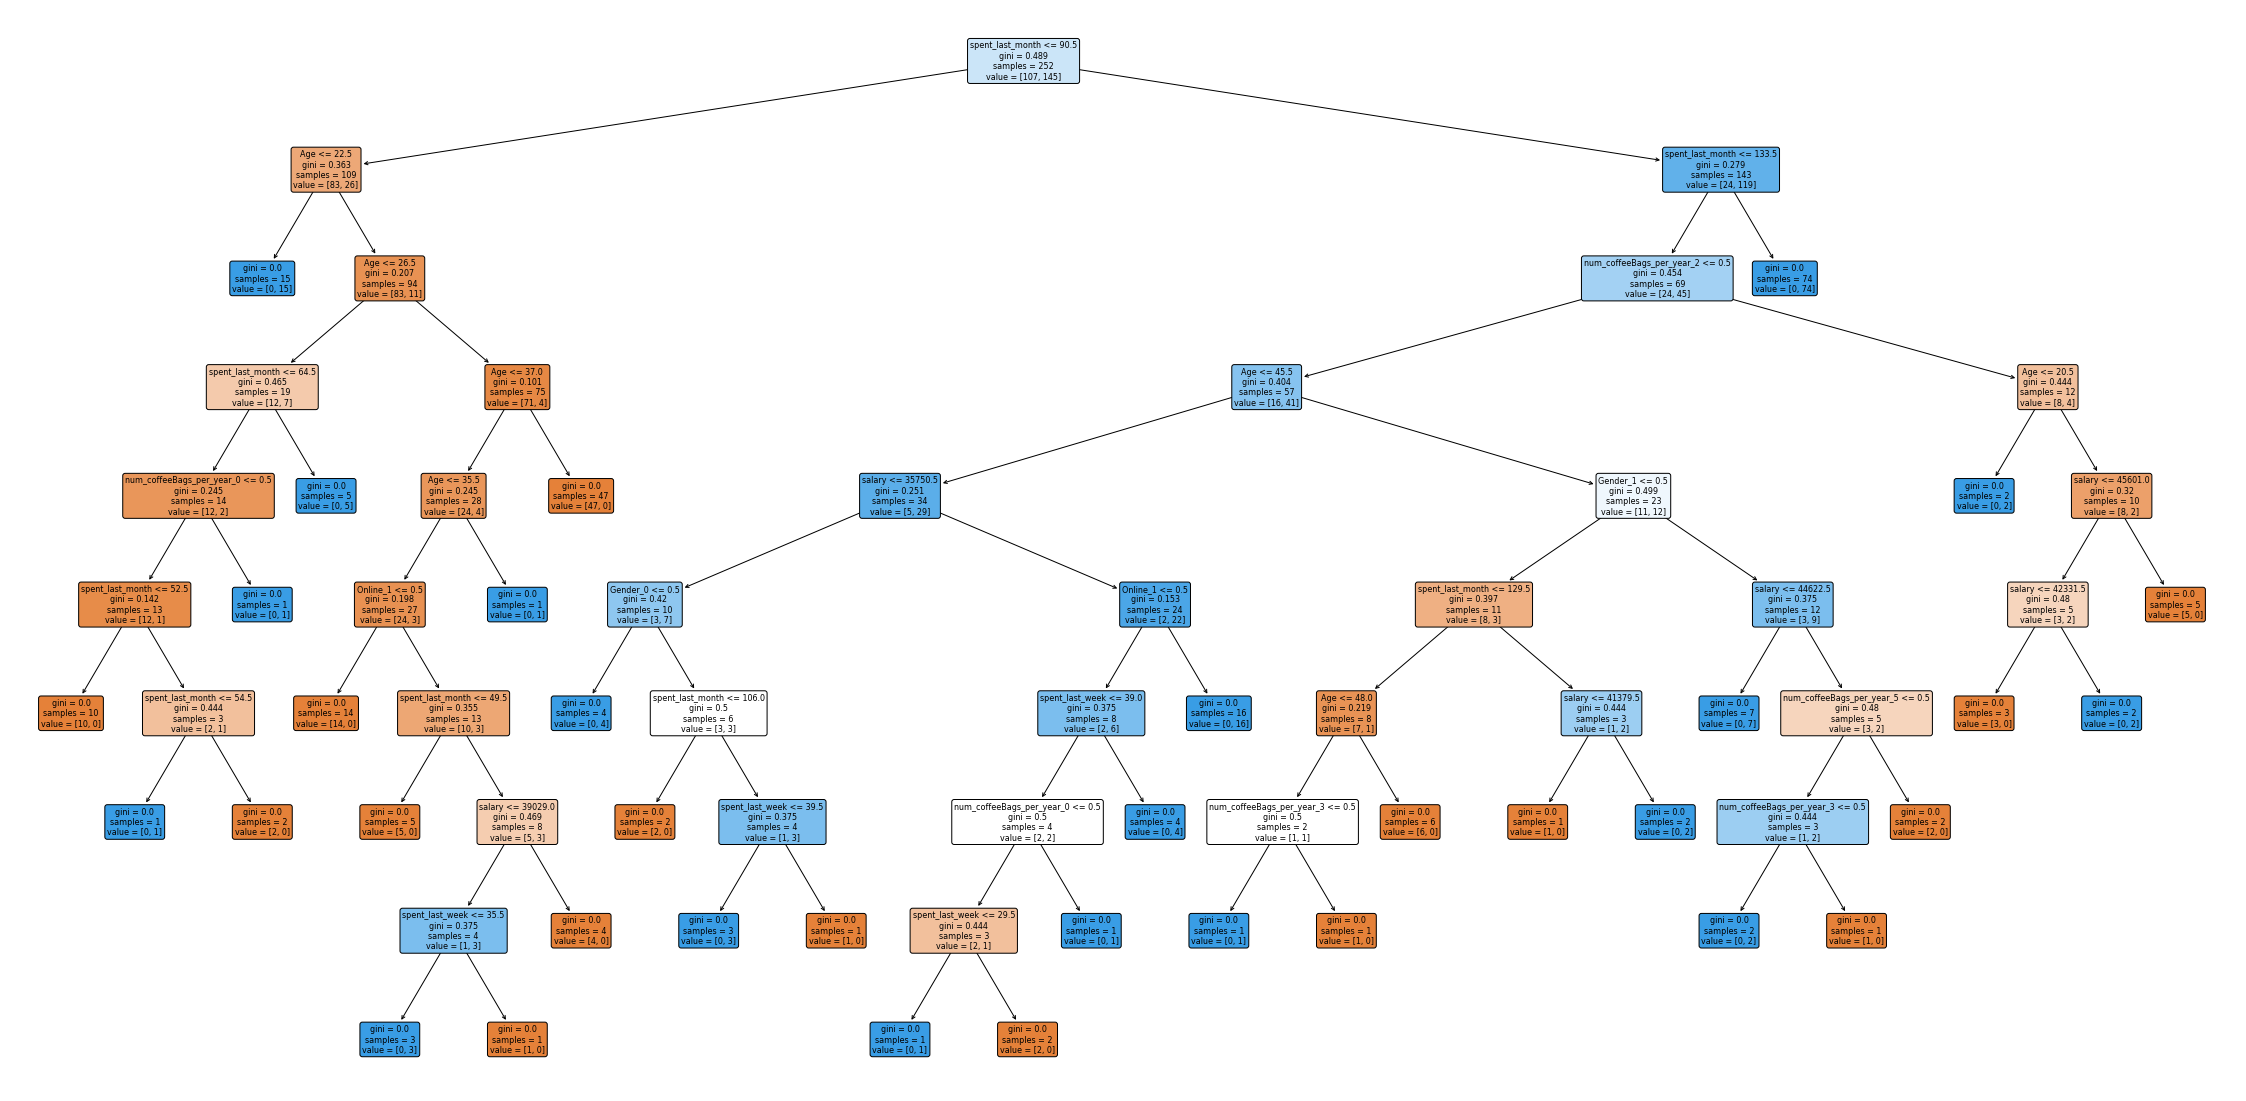

In [39]:
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(entr_model, feature_names = X_train.columns,filled=True, fontsize=8, rounded = True)
plt.show()

In [40]:
text_representation = tree.export_text(entr_model)
print(text_representation)

|--- feature_12 <= 90.50
|   |--- feature_10 <= 22.50
|   |   |--- class: YES
|   |--- feature_10 >  22.50
|   |   |--- feature_10 <= 26.50
|   |   |   |--- feature_12 <= 64.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_12 <= 52.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- feature_12 >  52.50
|   |   |   |   |   |   |--- feature_12 <= 54.50
|   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |--- feature_12 >  54.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: YES
|   |   |   |--- feature_12 >  64.50
|   |   |   |   |--- class: YES
|   |   |--- feature_10 >  26.50
|   |   |   |--- feature_10 <= 37.00
|   |   |   |   |--- feature_10 <= 35.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- feature_12 <= 49.50
|   |   |   |   |   |   |   |--- class: N

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [42]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.8333333333333334
Balanced accuracy: 0.838206627680312
Precision score for "Yes" 0.9215686274509803
Precision score for "No" 0.696969696969697
Recall score for "Yes" 0.8245614035087719
Recall score for "No" 0.8518518518518519


What can you infer from these results? Write your conclusions here: I would prefer to use a model with higher Accuracy,84% and Sensitivity(Recall) 84% of buying the new kind of coffee. I think we can try to make the model to increase its Accuracy by trying to tune some of its parameters.

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [43]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model=tree.DecisionTreeClassifier(criterion='gini') 

# Call fit() on the gini_model as you did with the entr_model
gini_model = gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred =gini_model.predict(X_test)

# Turn y_pred into a series, as before
pd.Series(y_pred) 

# Check out gini_model
gini_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

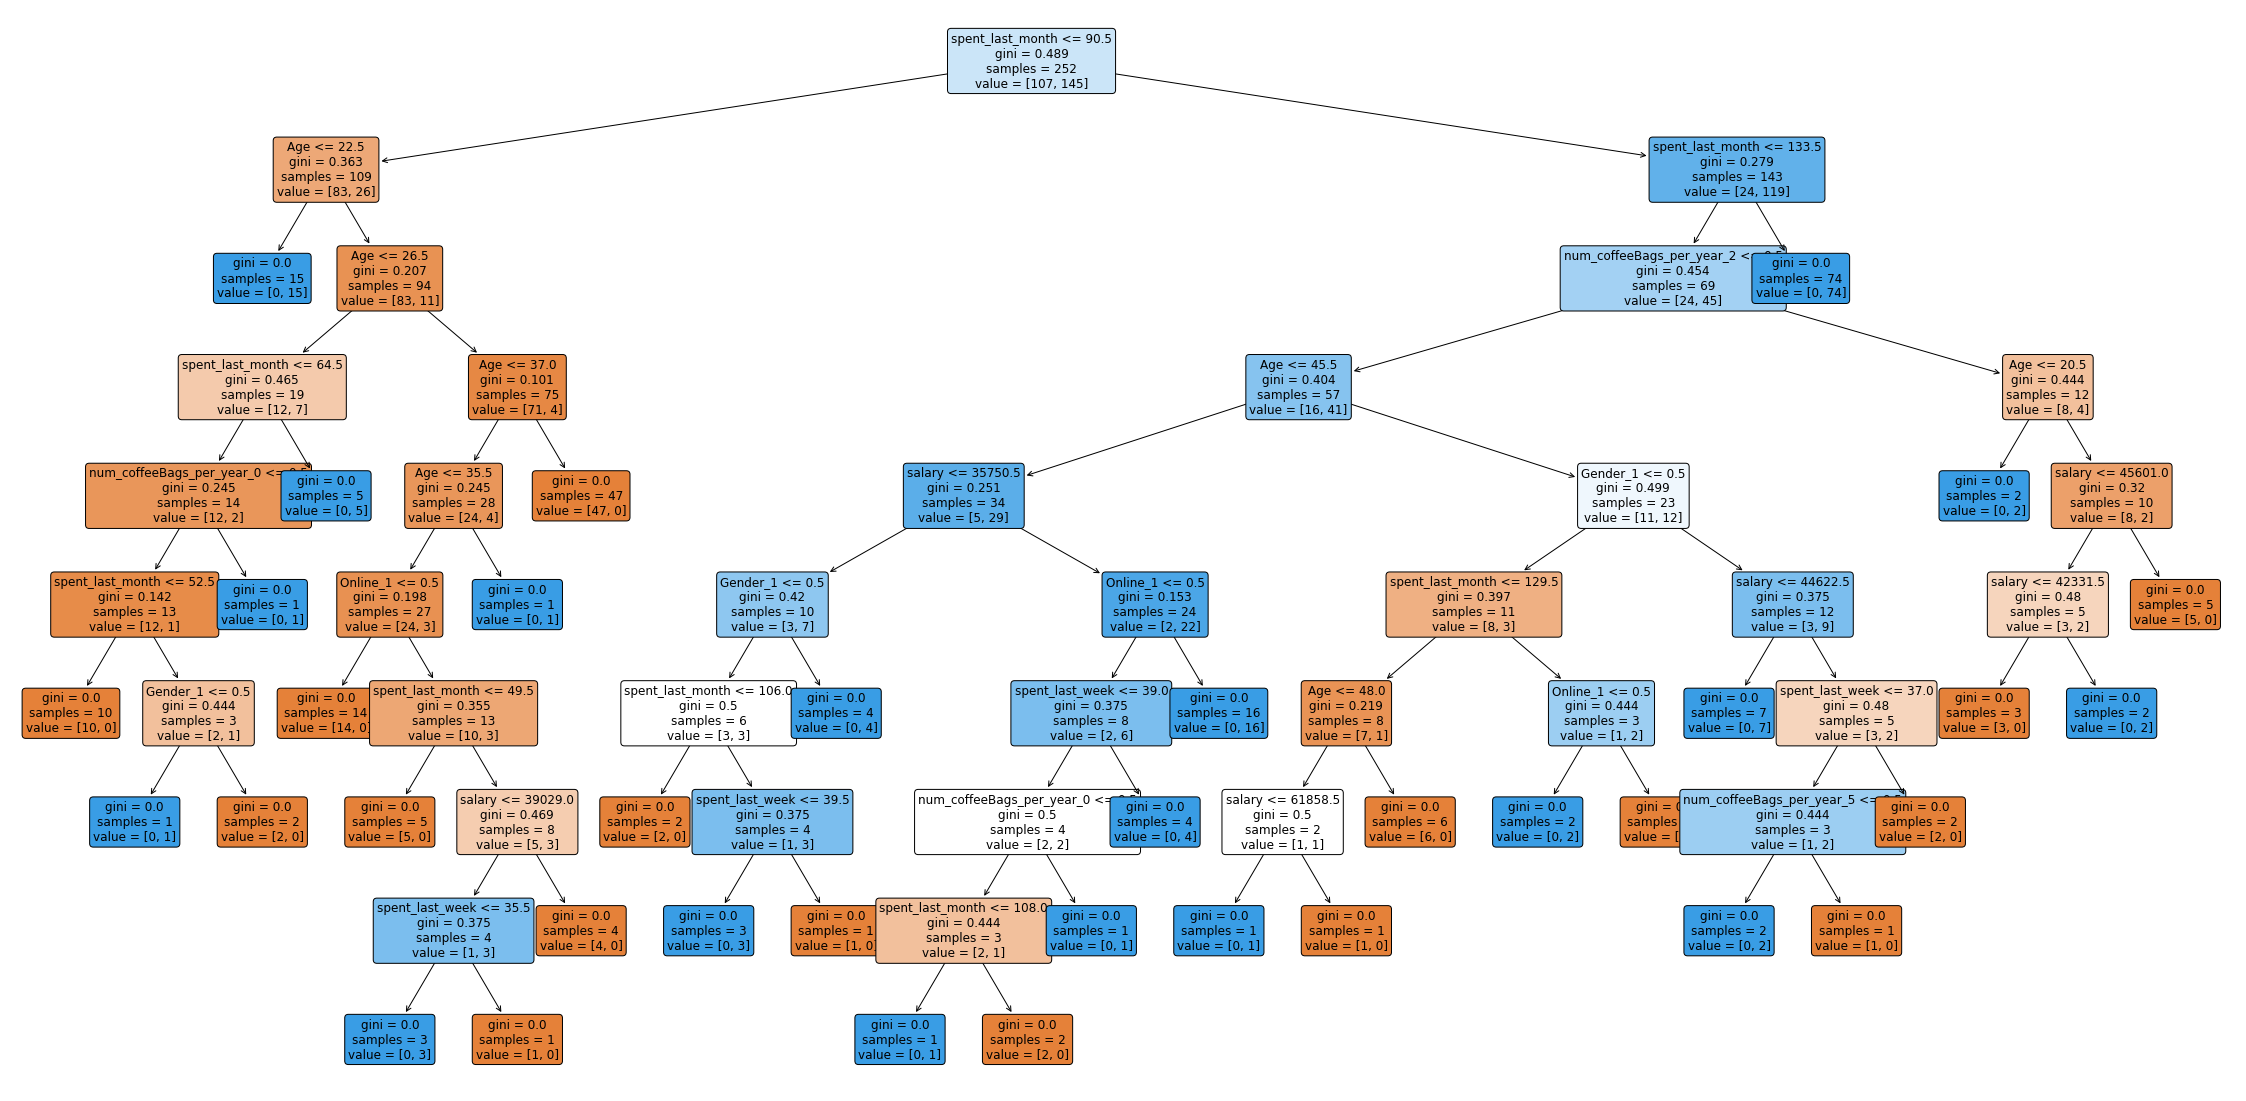

In [192]:
# As before, but make the model name gini_model
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(gini_model, feature_names = X_train.columns,filled=True, fontsize=12, rounded = True)
plt.show()

# Alternatively for class_names use gini_model.classes_


In [62]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score "YES"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))
print('Recall score "YES"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))

Model Gini impurity model
Accuracy: 0.8690476190476191
Balanced accuracy: 0.8742690058479532
Precision score "YES" 0.9423076923076923
Recall score 0.8888888888888888
Recall score "YES" 0.8596491228070176


How do the results here compare to the previous model? Write your judgements here: We can see that the Accuracy, 86%, has decreased same for Sensitivity (Recall), 81%. In this case the model did not improved by using the Gini criterion.



## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [45]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 

entr_model2=tree.DecisionTreeClassifier(max_depth=3)


# Call fit() 
entr_model2 = entr_model2.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred =entr_model2.predict(X_test)

# Turn y_pred into a series, as before
pd.Series(y_pred) 

# Check out gini_model
entr_model2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

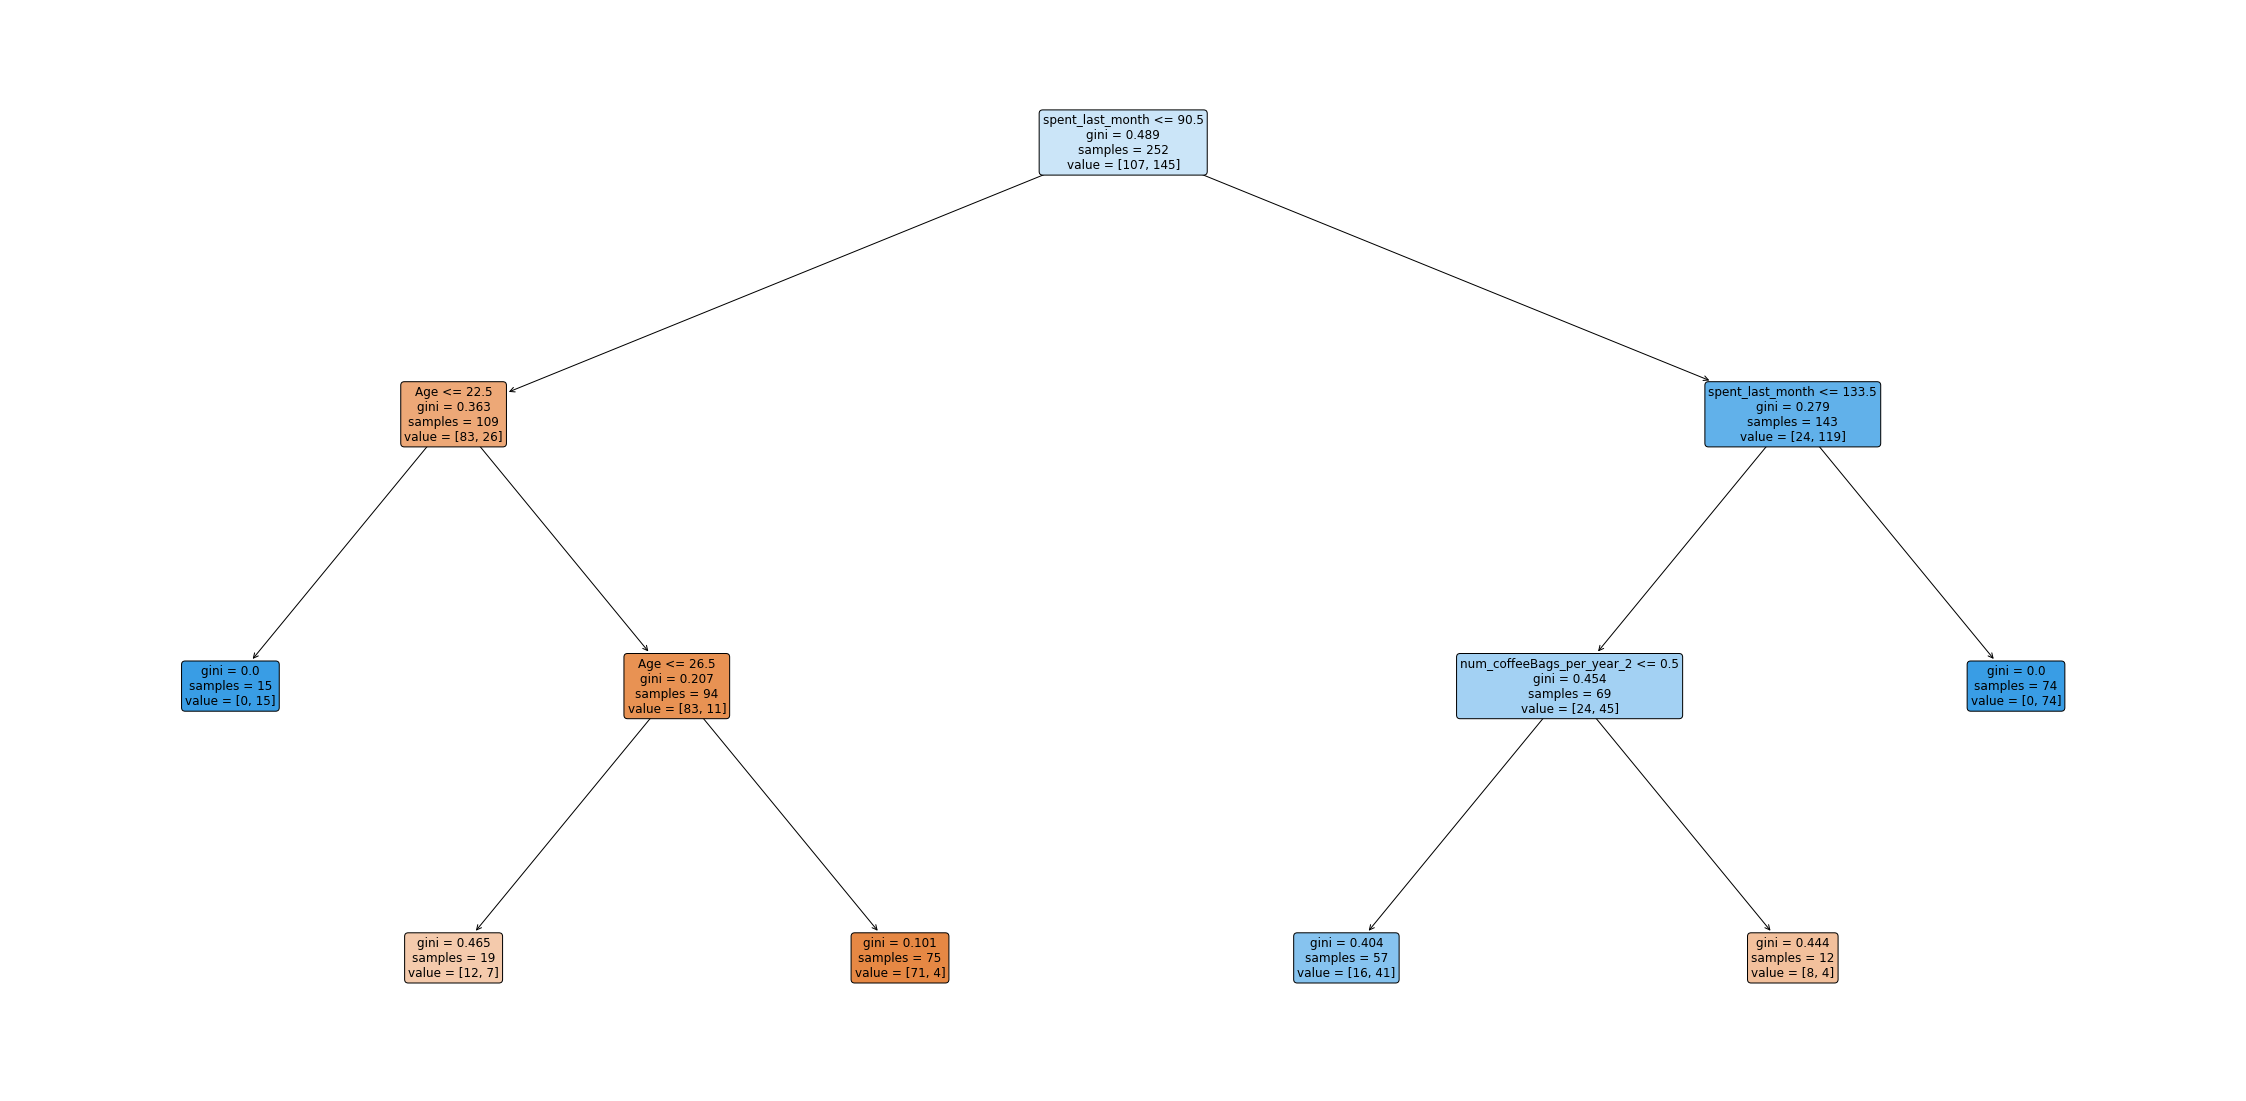

In [46]:
# As before, we need to visualize the tree to grasp its nature
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(entr_model2, feature_names = X_train.columns,filled=True, fontsize=12, rounded = True)
plt.show()


In [47]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.8690476190476191
Balanced accuracy: 0.8742690058479532
Precision score for "Yes" 0.9423076923076923
Recall score for "No" 0.8888888888888888


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here:   We can see that the Accuracy, 86%, has decreased same for Sensitivity (Recall), 81%. In this case the model did not improved by using the Gini criterion.




## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [50]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)

# Do the fit, predict, and series transformations as before. 
gini_model2=gini_model2.fit(X_train, y_train)


In [51]:
dot_data = StringIO()
# Call predict() on the gini_model as you did with the entr_model 
y_pred =gini_model2.predict(X_test)

# Turn y_pred into a series, as before
pd.Series(y_pred) 

# Check out gini_model
gini_model2


# Alternatively for class_names use gini_model2.classes_


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

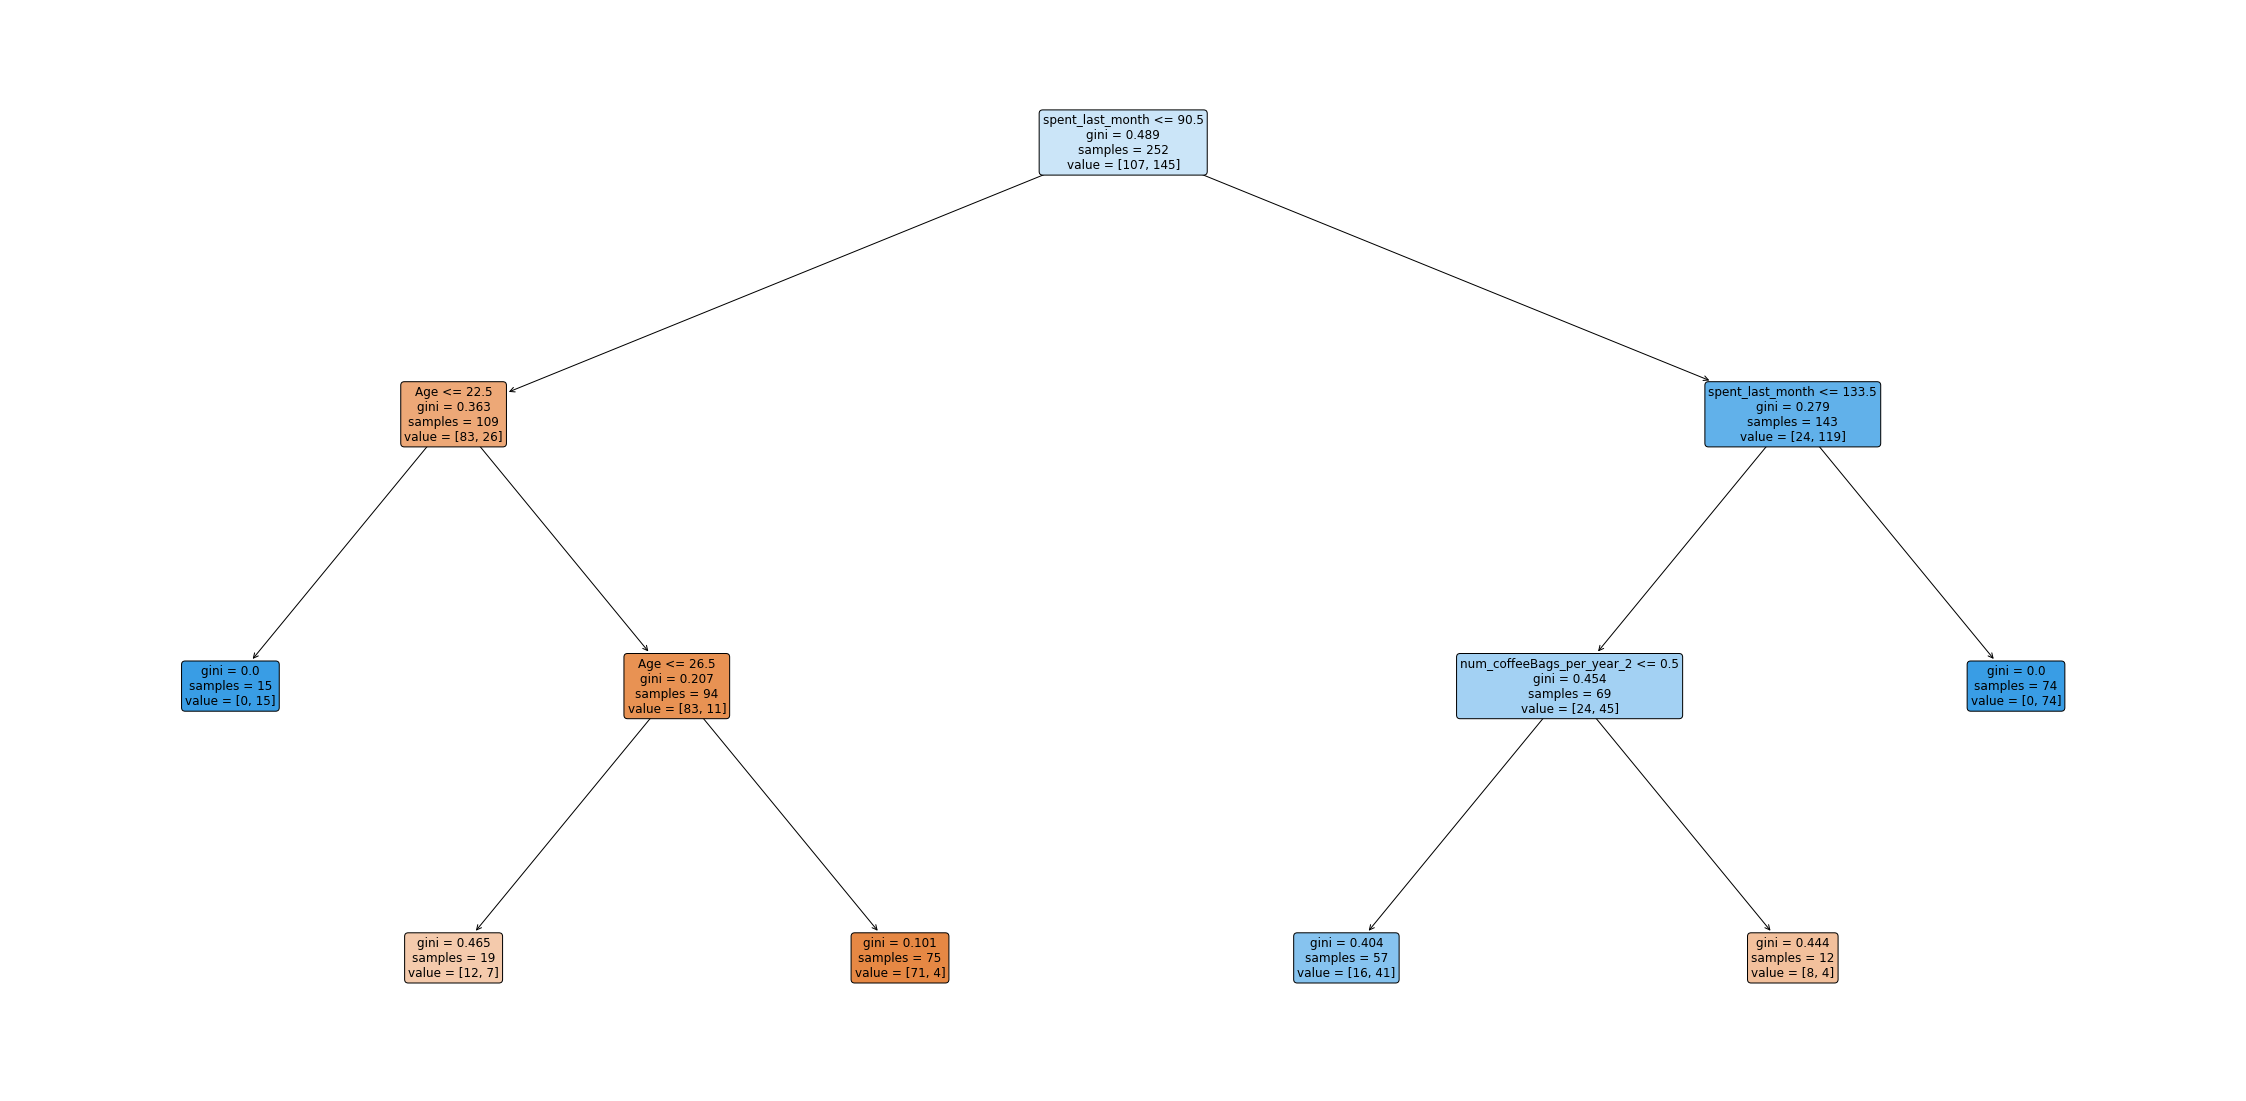

In [52]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(gini_model2, feature_names = X_train.columns,filled=True, fontsize=12, rounded = True)
plt.show()

In [58]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score "NO"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))
print('Recall score "YES" ', metrics.recall_score(y_test,y_pred, pos_label = "YES"))


Gini impurity  model - max depth 3
Accuracy: 0.8690476190476191
Balanced accuracy: 0.8742690058479532
Precision score 0.9423076923076923
Recall score "NO" 0.8888888888888888
Recall score "YES"  0.8596491228070176


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

We can see that the Accuracy, 86%, has decreased same for Sensitivity (Recall), 85%. In this case the model did not improved by using the Gini criterion.

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [59]:
# Call value_counts() on the 'Decision' column of the original coffeeData
result_NoNAN.Decision.value_counts()

YES    202
NO     134
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [61]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols=result_NoNAN.columns
print(feature_cols)
# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 


Index(['Gender_0', 'Gender_1', 'num_coffeeBags_per_year_0',
       'num_coffeeBags_per_year_1', 'num_coffeeBags_per_year_2',
       'num_coffeeBags_per_year_3', 'num_coffeeBags_per_year_4',
       'num_coffeeBags_per_year_5', 'Online_0', 'Online_1', 'Age',
       'spent_last_week', 'spent_last_month', 'salary', 'Decision'],
      dtype='object')


I already created the dummy variables and then I did the spliting of the train and test. So the test sets can now be used to predict. 
The model that I selected was the model that selects features based on Gini impurity and that limits the depth of the decision tree to three. I selected this model beacuase it is the simplest in terms of depth with a precission of buying the new product of 94.23%. This is similar to Model 2 and model 3 but being this a simplest model I decided to use it.

In [69]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set


# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers=gini_model2.predict(X_test)


# Call Series on our y_pred variable with the following: pd.Series(y_pred)
print(pd.Series(potential_buyers)) 


print(gini_model2)

0      NO
1      NO
2      NO
3     YES
4     YES
     ... 
79    YES
80    YES
81     NO
82     NO
83    YES
Length: 84, dtype: object
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [82]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
#pd.Series(potential_buyers).unique(return_counts=True)
#type(potential_buyers)
#potential_buyers.unique(return_counts=True)
unique_elements,counts_elements=np.unique(potential_buyers,return_counts=True)
          #,return_counts=True)
print(len(potential_buyers))
print('unique elements',unique_elements)
print('count of elements',counts_elements)

84
unique elements ['NO' 'YES']
count of elements [32 52]


The total number of potential buyers is 303 + 183 = 486

In [81]:
# Print the total number of surveyed people 
len(result_NoNAN)

336

In [87]:
# Let's calculate the proportion of buyers
print('proportion of predicted buyers',counts_elements[1]/len(potential_buyers))

proportion of predicted buyers 0.6190476190476191


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [89]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth=2, random_state=0)
firstRFModel.fit(X_train, y_train)

# Model and fit
y_pred=firstRFModel.predict(X_test)


    



/Users/jose1/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jose1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [91]:
print("Random Forest")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score "NO"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))
print('Recall score "YES" ', metrics.recall_score(y_test,y_pred, pos_label = "YES"))



Random Forest
Accuracy: 0.8452380952380952
Balanced accuracy: 0.8372319688109162
Precision score 0.9074074074074074
Recall score "NO" 0.8148148148148148
Recall score "YES"  0.8596491228070176


In [92]:
unique_elements,counts_elements=np.unique(y_pred,return_counts=True)
          #,return_counts=True)
print(len(y_pred))
print('unique elements',unique_elements)
print('count of elements',counts_elements)

84
unique elements ['NO' 'YES']
count of elements [30 54]


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22  5]
 [ 8 49]]
              precision    recall  f1-score   support

          NO       0.73      0.81      0.77        27
         YES       0.91      0.86      0.88        57

    accuracy                           0.85        84
   macro avg       0.82      0.84      0.83        84
weighted avg       0.85      0.85      0.85        84



In [90]:
print(y_pred)

['NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES']


In [93]:
# Let's calculate the proportion of buyers
print('proportion of predicted buyers',counts_elements[1]/len(y_pred))

proportion of predicted buyers 0.6428571428571429


### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 

There is no significant improvement with the Random Forest model. With a sensitivity of buying the new type of coffee of around 86% I do not feel confident to make a recommendation to continue with the plan of adding Hiden Farm as a product. But we need to take in to consideration that the current results do include the possible influence that a marketing campaing can take on current and possible users. Also we need in to consideration the demographics of the clients. 